In [23]:
from imutils import build_montages
import numpy as np
import cv2

In [24]:
XTrain = np.load('XTrain.npy')
YTrain = np.load('YTrain.npy')
XTest = np.load('XTest.npy')
YTest = np.load('YTest.npy')

In [25]:
print(XTrain.shape)
print(YTrain.shape)
print((XTrain, YTrain))

(4500, 224, 224, 3)
(4500,)
(array([[[[250, 246, 247],
         [250, 246, 247],
         [250, 246, 247],
         ...,
         [ 35,  29,  29],
         [ 34,  28,  28],
         [ 33,  27,  27]],

        [[250, 246, 247],
         [250, 246, 247],
         [250, 246, 247],
         ...,
         [ 35,  29,  29],
         [ 34,  28,  28],
         [ 34,  28,  28]],

        [[250, 246, 247],
         [250, 246, 247],
         [250, 246, 247],
         ...,
         [ 35,  29,  29],
         [ 34,  28,  28],
         [ 34,  28,  28]],

        ...,

        [[195, 185, 186],
         [204, 194, 195],
         [215, 205, 206],
         ...,
         [178, 168, 169],
         [187, 177, 178],
         [185, 175, 176]],

        [[188, 178, 179],
         [199, 189, 190],
         [211, 201, 202],
         ...,
         [191, 181, 182],
         [199, 189, 190],
         [208, 198, 199]],

        [[185, 175, 176],
         [194, 184, 185],
         [204, 194, 195],
         ...,
     

In [26]:
print(XTest.shape)
print(YTest.shape)
print((XTest, YTest))

(500, 224, 224, 3)
(500,)
(array([[[[ 52,  54,  51],
         [ 48,  50,  47],
         [ 43,  45,  42],
         ...,
         [ 45,  55,  46],
         [ 48,  58,  49],
         [ 49,  59,  50]],

        [[ 51,  53,  50],
         [ 47,  49,  46],
         [ 43,  45,  42],
         ...,
         [ 45,  55,  46],
         [ 47,  57,  48],
         [ 48,  58,  49]],

        [[ 49,  51,  48],
         [ 46,  48,  45],
         [ 42,  44,  41],
         ...,
         [ 48,  56,  45],
         [ 48,  56,  45],
         [ 48,  56,  45]],

        ...,

        [[ 54, 103, 144],
         [ 57, 106, 147],
         [ 64, 116, 155],
         ...,
         [ 70, 101, 130],
         [ 57,  88, 117],
         [ 51,  82, 111]],

        [[ 56, 108, 148],
         [ 58, 110, 150],
         [ 66, 118, 158],
         ...,
         [ 75, 106, 135],
         [ 64,  95, 124],
         [ 60,  91, 120]],

        [[ 59, 111, 151],
         [ 59, 111, 151],
         [ 65, 117, 157],
         ...,
       

In [27]:
def make_pairs(images, labels):
    
    pairImages=[]
    pairLabels=[]
    
    numClasses = len(np.unique(labels))
    # Loop for numClasses
    # Where labels in loop are itself, store it
    # Print label(i): # of label in dataset(length of idx), [print every label where label == label](idx)
    idx = [np.where(labels == i)[0] for i in range(0, numClasses)]
    # Loop all imgs
    for idxA in range(len(images)):
        # get img & label for current iteration
        currentImage = images[idxA]
        label = labels[idxA]
        # Rand pick img belonging to smame class & label
        idxB = np.random.choice(idx[label])
        posImage = images[idxB]
        # Create a pos pair & update params
        pairImages.append([currentImage, posImage])
        pairLabels.append([1])
        # Find where the labels are not the same & rand pick 2 != pairs
        negIdx = np.where(labels != label)[0]
        negImage = images[np.random.choice(negIdx)]
        # Get neg pairs & append list
        pairImages.append([currentImage, negImage])
        pairLabels.append([0])
        
    return (np.array(pairImages), np.array(pairLabels))

40


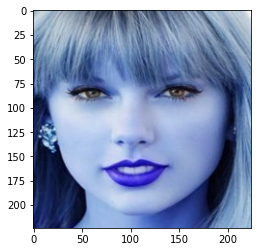

In [28]:
import matplotlib.pyplot as plt

image_index = 400
print(YTrain[image_index])
plt.imshow(XTest[image_index], cmap='Greys')
plt.show()

In [29]:
print('Getting pos & neg pairs')
(pairTrain, labelTrain) = make_pairs(XTrain, YTrain)
(pairTest, labelTest) = make_pairs(XTest, YTest)
print('Pairs made')

Getting pos & neg pairs
Pairs made


In [48]:
images = []

for i in np.random.choice(np.arange(0, len(pairTrain)), size=(96,)):
    
    imageA = pairTrain[i][0]
    imageB = pairTrain[i][1]
    label = labelTrain[i]
    
    output = np.zeros((232, 448, 3), dtype="uint8")
    pair = np.hstack([imageA, imageB])
    output[4:228, 0:448] = pair
    
    text = "neg" if label[0] == 0 else "pos"
    color = (0, 0, 255) if label[0] == 0 else (0, 255, 0)
    
    vis = cv2.merge([output])
    vis = cv2.resize(vis, (96, 51), interpolation=cv2.INTER_LINEAR)
    cv2.putText(vis, text, (2, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)
    
    images.append(vis)

montage = build_montages(images, (96, 51), (7, 7))[0]

cv2.imshow("Siamese Image Pairs", montage)
cv2.waitKey(0)

-1